<a href="https://colab.research.google.com/github/Pallavi-mohanty/Capstone-Project-Telco-Churn/blob/main/MAIN_Capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   **CAPSTONE PROJECT TITLE: CUSTOMER CHURN PREDICTION**
---
# **TELCO CHURN ANALYSIS**
---
**Dataset Info:** Sample Data Set containing Telco customer data and showing customers left last month

**Q. What is Customer Churn?**
* Customer churn is defined as when customers or subscribers discontinue doing business with a firm or service
* Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

**This dataset includes information about:**
* **Customers who left within the last month –** the column is called Churn .
* **Services that each customer has signed up for –** PhoneServices, multiple lines, InternetServices, online security, online backup, device protection, tech support, and streaming TV and movies.
* **Customer account information –** how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and totalcharges.  
* **Demographic information about customers –** CustomerID, gender and if they have partners and dependents.

**1.** Columns Decription customerID - Customer ID

**2.** gender - Whether the customer is a male or a female

**3.** SeniorCitizen - Whether the customer is a senior citizen (1, 0)

**4.** Partner - Whether the customer has a partner (Yes, No)

**5.** Dependents - Whether the customer has dependents (Yes, No)

**6.** tenure - Number of months the customer has stayed with the company

**7.** PhoneService - Whether the customer has a phone service (Yes, No)

**8.** MultipleLines - Whether the customer has multiple lines (Yes, No, No phone service)

**9.** InternetService - Customer’s internet service provider (DSL, Fiber optic, No)

**10.** OnlineSecurity - Whether the customer has online security (Yes, No, No internet service)

**11.** OnlineBackup - Whether the customer has online backup or not (Yes, No, No internet service)

**12.** DeviceProtection - Whether the customer has device protection (Yes, No, No internet service)

**13.** TechSupport - Whether the customer has tech support (Yes, No, No internet service)

**14.** StreamingTV - Whether the customer has streaming TV service (Yes, No, No internet service)

**15.** StreamingMovies - Whether the customer has streaming movies service (Yes, No, No internet service)

**16.** Contract - Indicates the type of the contract (Month-to-month, One year, Two year)

**17.** PaperlessBilling - Whether the customer has paperless billing (Yes, No)

**18.** PaymentMethod - Indicates the payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))

**19.** MonthlyCharges - Indicates the current monthly subscription cost of the customer

**20.** TotalCharges - Indicates the total charges paid by the customer so far

**21.** Churn - Indicates whether the customer churned

# This is a classic Telecom Churn Usecase.



# **I - DATA LOADING**

**1.** Loading the Datafile and reading the Dataset

In [ ]:
#import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
telco_churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# **II - DATA EXPLORING**

**1.** Looking at the dataset

In [ ]:
telco_churn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


**2.** Looking at the top 10 records of dataset.

In [ ]:
telco_churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


**3.** Looking at the last 10 dataset

In [ ]:
telco_churn.tail(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7033,9767-FFLEM,Male,0,No,No,38,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),69.50,2625.25,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7035,8456-QDAVC,Male,0,No,No,19,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),78.70,1495.1,No
7036,7750-EYXWZ,Female,0,No,No,12,No,No phone service,DSL,No,...,Yes,Yes,Yes,Yes,One year,No,Electronic check,60.65,743.3,No
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


**4.** Sample overview - Looking for the random dataset as an sample

In [ ]:
telco_churn.sample(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5571,9107-UKCKY,Male,0,Yes,No,61,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,One year,Yes,Electronic check,79.80,4914.8,No
1179,5461-QKNTN,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Electronic check,94.30,3953.15,No
5092,5774-XZTQC,Female,0,Yes,Yes,7,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,150.75,No
26,6467-CHFZW,Male,0,Yes,Yes,47,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
2989,3308-MHOOC,Male,0,No,Yes,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.20,19.2,No
6600,4592-IWTJI,Female,0,Yes,Yes,3,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Credit card (automatic),29.70,91.7,Yes
6571,2188-SXWVT,Female,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Mailed check,55.00,1885.15,No
5096,0363-SVHYR,Male,0,Yes,Yes,71,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),86.85,6263.8,No
4596,2432-TFSMK,Male,0,No,No,18,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,No,One year,Yes,Credit card (automatic),89.60,1633,No
640,9574-BOSMD,Male,0,Yes,Yes,68,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.40,1620.2,No


**5.** Looking at the size of the dataset.
* size=number of rows×number of columns.
* 'size' includes all elements, regardless of whether they contain actual data or are missing/NaN values.



In [ ]:
telco_churn.size

147903

* **Checking the various attributes of dataset like Shape (Total number of Rows and Columns), Columns name, Datatypes of columns, Dimensionality, Information(Memory size,Datatypes,NAN values), Describe(Min,Max,Median,25 %,75 %,and so on...)**

**1.** Shape

In [ ]:
telco_churn.shape

(7043, 21)

In [ ]:
print("Number of columns:",telco_churn.shape[0])
print("Number of rows:",telco_churn.shape[1])

Number of columns: 7043
Number of rows: 21


**2.** Column names

In [ ]:
telco_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

**3.** Datatypes of columns

In [ ]:
telco_churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**OBSERVATION -** Here the TotalCharges should be float or int but it is object so their might be some missing values in this columns i.e we need to change it into float or int

**4.** DImensionality

In [ ]:
telco_churn.ndim

2

**5.** Information

In [ ]:
telco_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**6.** Describe - Checking the descriptive statistics of numeric variables

* **describe() method** is useful for quickly understanding the distribution and central tendency of your numerical data.

In [ ]:
telco_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**OBSERVATION -**

**1.** In SeniorCitizen columns, It is actually a Categorical in real world scenario hence the 25%-50%-75% distribution is not proper.

**2.** In tenure columns,
* The first quartile is 9, meaning that 25% of customers have been with the service for 9 months or fewer.
* The median is 29, indicating that 50% of customers have been with the service for 29 months or fewer.
* The third quartile is 55, showing that 75% of customers have been with the service for 55 months or fewer.

**3.** In MonthlyCharges columns,Average Monthly charges are USD 64.76 whereas 75% customers pay more than USD 89.85 per month.

* **Checking value_counts(), nunique(), Duplicated().sum() ,isnull().sum()**

**1.** value_counts()- Obtaining the count of unique values

In [ ]:
telco_churn.gender.value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [ ]:
telco_churn.SeniorCitizen.value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [ ]:
telco_churn.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
for column in telco_churn.columns:
    if column != 'customerID':
        value_counts = telco_churn[column].value_counts()
        print(f"\nValue counts for {column}:\n{value_counts}")


Value counts for gender:
Male      3555
Female    3488
Name: gender, dtype: int64

Value counts for SeniorCitizen:
0    5901
1    1142
Name: SeniorCitizen, dtype: int64

Value counts for Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64

Value counts for Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64

Value counts for tenure:
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64

Value counts for PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64

Value counts for MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

Value counts for InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

Value counts for OnlineSecurity:
No                     3498
Yes                    2019
No internet service    1526
Name: Onlin

**OBSERVATION -** In all the above shows that, there was no column with name issue but No internet service and No phone service means the same as 'NO'

**2.** nunique() - Returning a series object that displays the count of unique values of each columns

In [ ]:
telco_churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

**3.** duplicated().sum() - Looking for duplicated values

In [ ]:
telco_churn.duplicated().sum()

0

**OBSERVATION -** No duplicated values

**4.** isnull().sum() - Looking for Missing values

In [ ]:
telco_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**OBSERVATION -** There is no missing values in the above dataset

# **III - DATA CLEANING**

**(1). Churn Column - Target Column**

**1.1.** Creating a copy of telco_churn for manupulation & processing


In [ ]:
telco_copy = telco_churn.copy()

**1.2.** Converting churn column a Categorical value to Numerical Value

In [ ]:
telco_copy['Churn'] = np.where(telco_copy.Churn == 'Yes',1,0)

In [ ]:
telco_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
telco_copy['Churn'].dtype

dtype('int64')

**(2). TotalCharges Column**

**2.1.** Total Charges should be numeric amount. Let's convert it to numerical data type

In [ ]:
telco_churn.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


**OBSERVATION -** For TotalCharges column,

* unique: 6531 (6531 unique values)
* top: "   " (the most frequent value in the "Totalcharges" column is white spaces)
* freq: 11 (the count of "    " occurrences in the "TotalCharges" column

In [ ]:
telco_copy.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**OBSERVATION -** As There are whites spaces in the TotalCharges Column therefore we cannot see the missing values.

**2.2.** we will be filling the white spaces with NAN values by using errors='coerce'

In [ ]:
telco_copy.TotalCharges = pd.to_numeric(telco_copy.TotalCharges, errors='coerce')
telco_copy.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

**OBSERVATION -** In this we can see that 11 missing values are there in TotalCharges

**2.3.** As we can see there are 11 missing values in TotalCharges column. Let's check its records

In [ ]:
telco_copy.loc[telco_copy ['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,0
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,0
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,0
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,0
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,0
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,0
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,0
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,0
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,0
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,0


In [ ]:
Miss_rows=telco_copy.loc[telco_copy ['TotalCharges'].isnull() == True]

**2.4.** Calculating the percentage of NaN values with respect to the total number of rows

In [ ]:
percentage_nan = (len(Miss_rows) / len(telco_copy)) * 100

print(f"Percentage of NaN values in 'TotalCharges': {percentage_nan:.2f}%")

Percentage of NaN values in 'TotalCharges': 0.16%


**OSERVATION -** Since the % of these records compared to total dataset is very low i.e 0.16%, it is safe to fill them with 0 for further processing.

**2.5.** Missing Value Treatment

In [ ]:
telco_copy.fillna(0, inplace=True)

In [ ]:
telco_copy.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**2.6.** Checking the data type of the 'TotalCharges' column

In [ ]:
telco_copy['TotalCharges'].dtype

dtype('float64')

# **III - 1. BINNING**

**(3). Tenure Column**

**3.1.** Getting the maximum tenure

In [ ]:
telco_copy['tenure'].max()

72

**3.2.** Dividing customers into bins based on tenure.

for e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure 1 Yrs > and < 2 Yrs, tenure group of 13-24; so on...   **(i.e - Grouping the tenure in bins of 12 months)**

In [ ]:
Tenure_groupy = ["{0} - {1}".format(i, i + 11) for i in range(1, 72, 12)]

telco_copy['tenure_group'] = pd.cut(telco_copy.tenure, range(1, 80, 12), right=False, labels=Tenure_groupy)
telco_copy['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

**OBSERVATION -** As we created a tenure_group column we no longer need tenure column

**3.3.** Droping tenure column as we already created an tenure_group.  

In [ ]:
telco_copy.drop(columns= ['tenure'], axis=1, inplace=True)
telco_copy.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [ ]:
telco_copy['tenure_group']=telco_copy['tenure_group'].astype('object')

In [ ]:
telco_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
tenure_grp = telco_copy.groupby('tenure_group')[['Churn']].sum().reset_index()
sorted_tenure_grp = tenure_grp.sort_values(by='tenure_group')
styled_df = sorted_tenure_grp.style.background_gradient(cmap='gist_rainbow_r', subset=['Churn'])
styled_df

,tenure_group,Churn
0,1 - 12,1037
1,13 - 24,294
2,25 - 36,180
3,37 - 48,145
4,49 - 60,120
5,61 - 72,93


**(4). CustomerID Column**

**4.1.** Droping column customerID as it is not relevant

In [ ]:
telco_copy.drop(columns= ['customerID'], axis=1, inplace=True)
telco_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**(5). Modifying**

**5.1** 'No internet service' and 'No phone service' are not different from No and can be replaced with "No"

In [ ]:
telco_copy['MultipleLines'].replace('No phone service', 'No', inplace=True)
for i in ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']:
    telco_copy[i].replace('No internet service', 'No', inplace=True)
telco_copy

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,13 - 24
7039,Female,0,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,61 - 72
7040,Female,0,Yes,Yes,No,No,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1 - 12
7041,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1,1 - 12


# **IV - DATA VISUALIZATION**

# **IV - 1. UNIVARIATE ANALYSIS**

**1. Numerical vs Categorical Features**

**1.1.** Finding out the numerical features



In [ ]:
telco_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [ ]:
numerical_features = telco_copy.select_dtypes(include=[np.number])
numerical_features.columns

Index(['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

**1.2.** Finding out the categorical features

In [ ]:
categorical_features = telco_copy.select_dtypes(include=[object])
categorical_features.columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'tenure_group'],
      dtype='object')

**2. Univariate Analysis For Categorical Features**

**2.1** Countplot

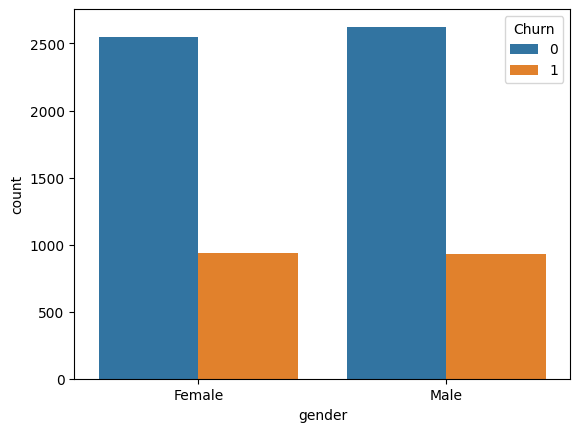

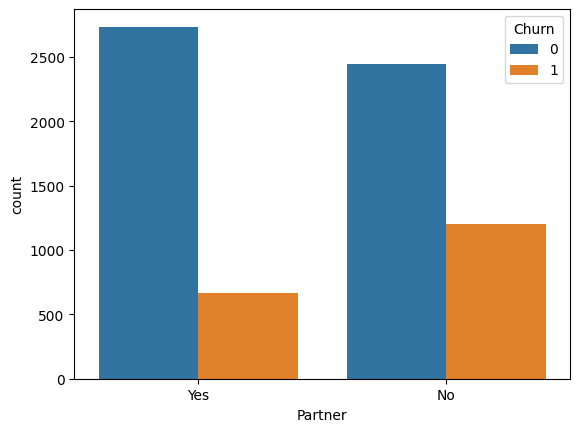

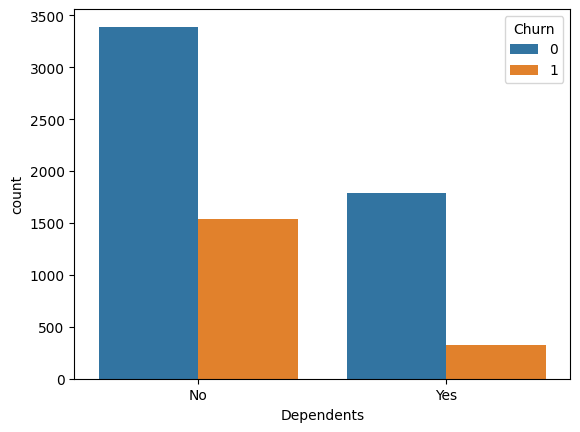

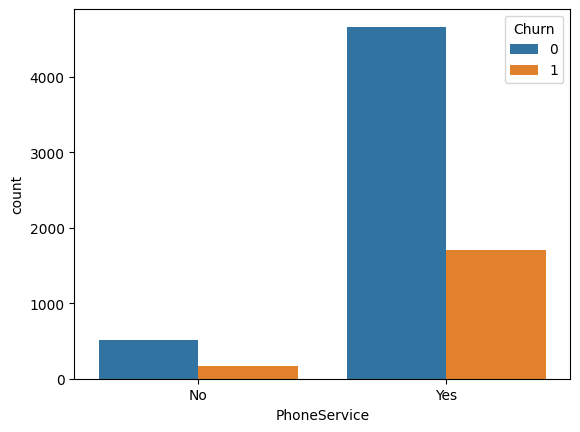

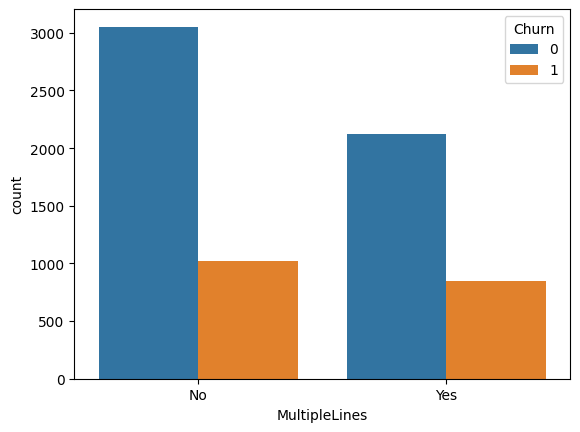

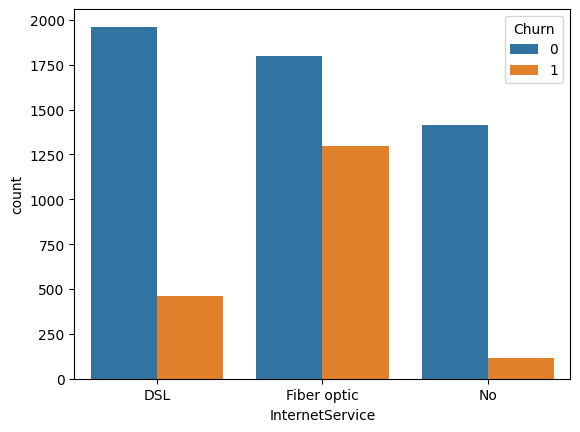

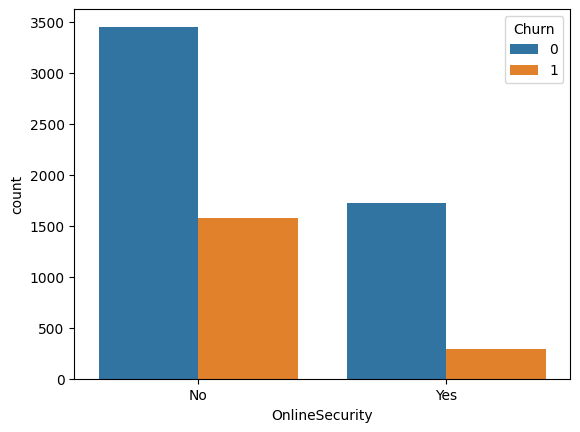

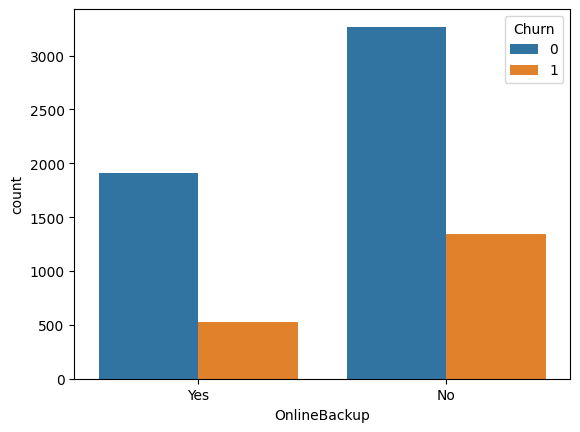

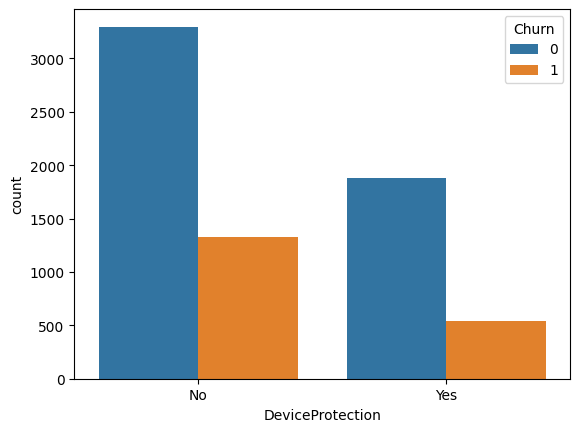

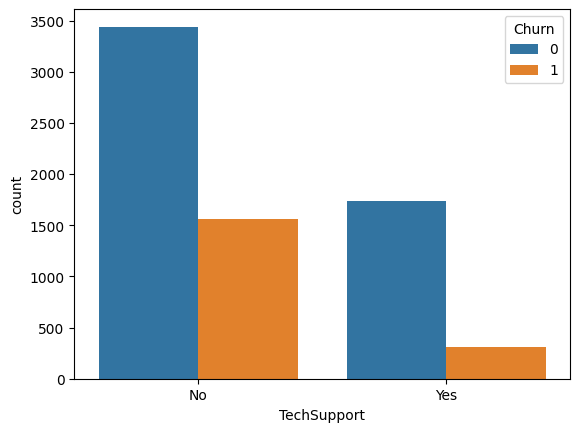

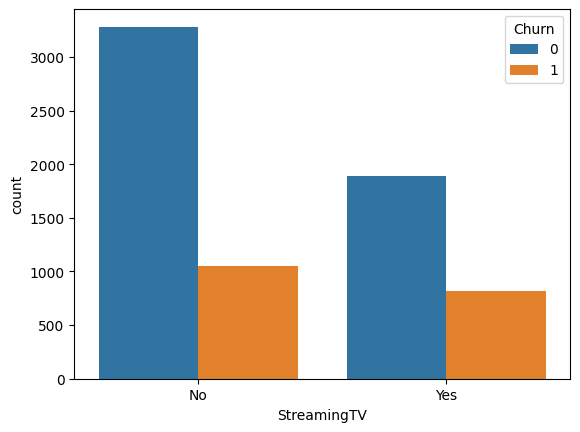

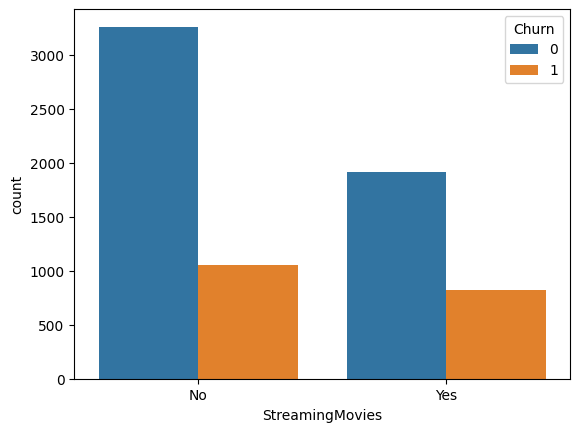

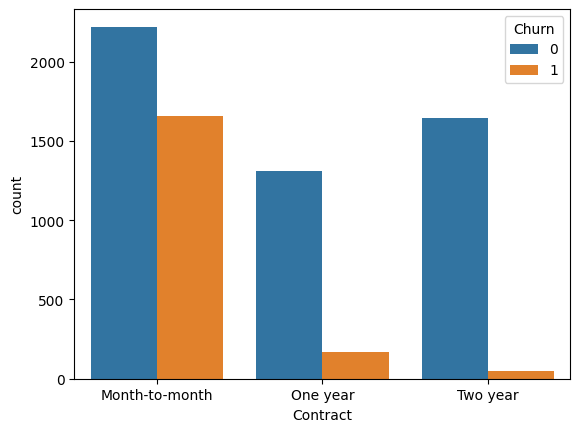

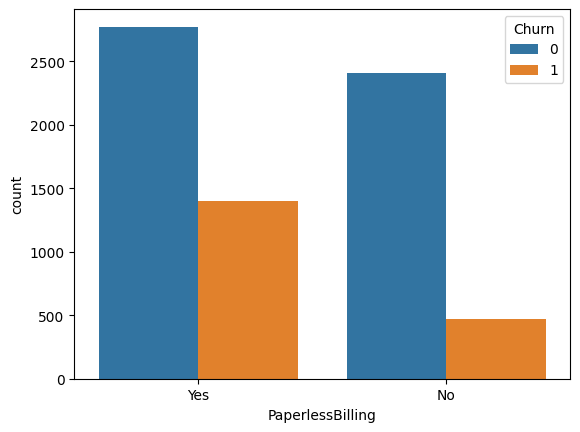

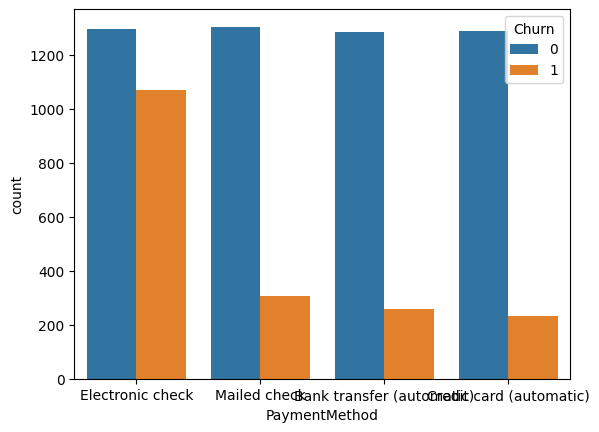

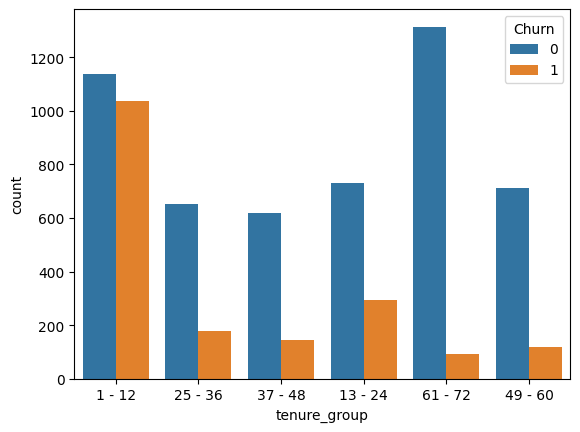

In [ ]:
for i, predictor in enumerate(telco_copy.drop(columns=['SeniorCitizen', 'MonthlyCharges', 'TotalCharges', 'Churn'])):
    plt.figure(i)
    sns.countplot(data=telco_copy, x=predictor,hue='Churn')

**OBSERVATIION -**
**1.** Customers with no Partner and Dependents has churned more.

**2.** PhoneServices and Paperless billing customer has chosen by a significant number of customers has churned is less and not churned is more.

**3.** Customers with no multipleLines, no OnlineSecurity, no OnlineBackup, no DeviceProtection, no TechSupport, no StreamingTV, no StreamingMovies has highly churned.

**4.** Customers with Fiber opticInternet service type has churned more  DSL is the most popular internet service type.

**5.** Most customers prefer month-to-month contracts and also most people has churned from month-to-month contracts.

**6.** Electronic check is the most common payment method of churning more customers

**7.** Customers with 1-12 tenure_group has churned more

**8.** The gender distribution is roughly balanced

**2.2** PieChart

([<matplotlib.patches.Wedge at 0x7c24421d7460>,
 [Text(-0.016436707732256382, 1.0998771907076375, 'Male'),
  Text(0.016436707732256247, -1.0998771907076375, 'Female')],
 [Text(-0.008965476944867117, 0.5999330131132566, '50.48%'),
  Text(0.008965476944867044, -0.5999330131132566, '49.52%')])

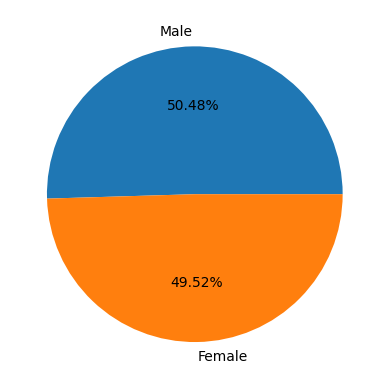

In [ ]:
gender_name=telco_copy.gender.value_counts().index
gender_val=telco_copy.gender.value_counts().values

plt.pie(gender_val,labels=gender_name,autopct='%1.2f%%')

**OBSERVATION -** Male has 50.48 %

([<matplotlib.patches.Wedge at 0x7c24420320e0>,
 [Text(0.5426181731482101, 0.956851878907754, 'Electronic check'),
  Text(-1.0466614167922357, 0.33837830692653775, 'Mailed check'),
  Text(-0.5037781622923265, -0.9778586621784185, 'Bank transfer (automatic)'),
  Text(0.8560892632593112, -0.690732345653604, 'Credit card (automatic)')],
 [Text(0.2959735489899328, 0.5219192066769567, '33.58%'),
  Text(-0.5709062273412193, 0.18456998559629328, '22.89%'),
  Text(-0.27478808852308717, -0.5333774520973191, '21.92%'),
  Text(0.46695777995962423, -0.3767630976292385, '21.61%')])

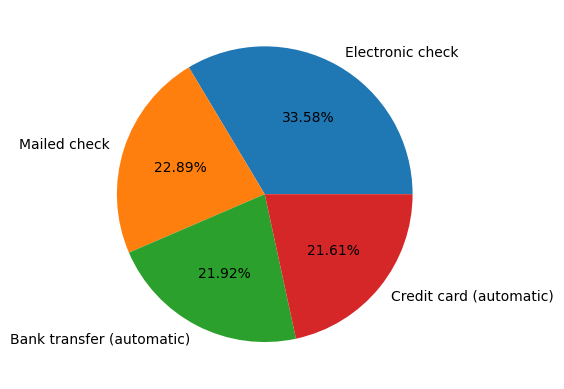

In [ ]:
PaymentMethod_name=telco_copy.PaymentMethod.value_counts().index
PaymentMethod_val=telco_copy.PaymentMethod.value_counts().values

plt.pie(PaymentMethod_val,labels=PaymentMethod_name,autopct='%1.2f%%')

**OBSERVATION -** ELectronic check is 33.58%

**3. Univariate Analysis for Numerical Features**

**3.1** Histogram

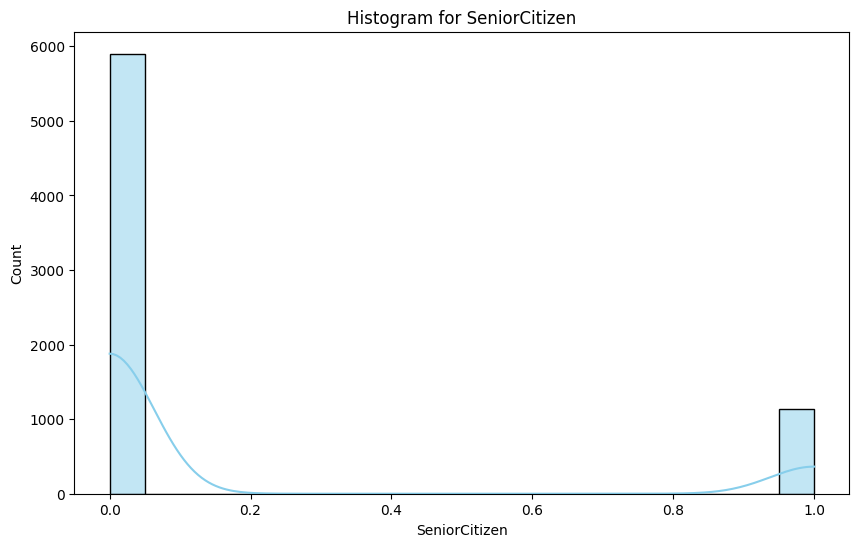

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(telco_copy['SeniorCitizen'], bins=20, kde=True, color='skyblue')
plt.title('Histogram for SeniorCitizen')
plt.show()

In [ ]:
telco_churn['SeniorCitizen'].skew()

1.8336327440928564

**OBSERVATION -** The distribution appears to be right-skewed, with a longer tail on the right side. This indicates that there are fewer senior citizens in the dataset.


**3.2** BoxPlot

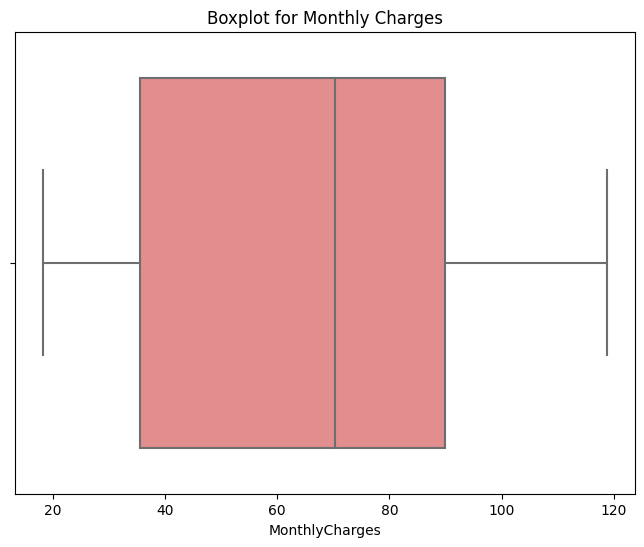

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=telco_copy, x='MonthlyCharges', color='lightcoral')
plt.title('Boxplot for Monthly Charges')
plt.show()

**OBSERVATION -** Very less outliers in MonthlyCharges

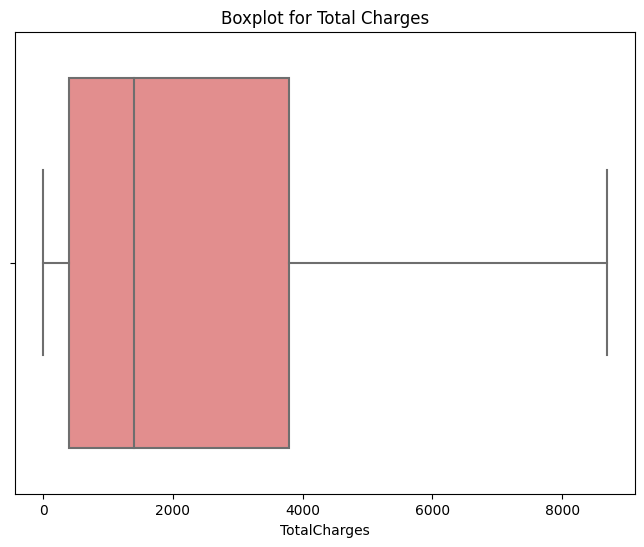

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=telco_copy, x='TotalCharges', color='lightcoral')
plt.title('Boxplot for Total Charges')
plt.show()

**3.3** Distplot

<ipython-input-53-606dd2df47c4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(telco_copy['TotalCharges'])


<Axes: xlabel='TotalCharges', ylabel='Density'>

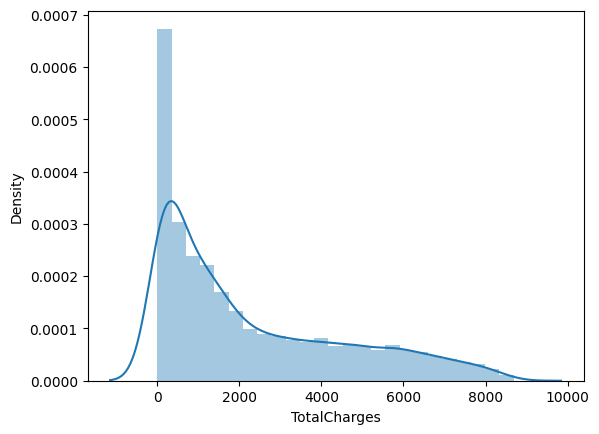

In [ ]:
sns.distplot(telco_copy['TotalCharges'])

In [ ]:
telco_copy['TotalCharges'].skew()

0.963234654832277

**OBSERVATION -**  It indicates that the distribution of 'TotalCharges' is positively skewed.

**3.4** CountPlot

In [ ]:
telco_copy['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

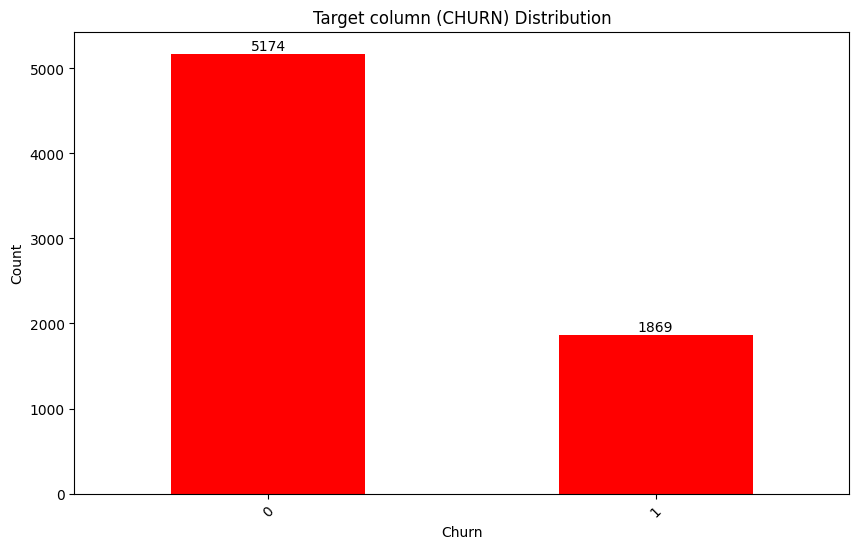

In [ ]:
churn_counts = telco_copy['Churn'].value_counts()

plt.figure(figsize=(10, 6))                              # Plotting with matplotlib
churn_counts.plot(kind='bar', rot=45, color='red')
plt.title('Target column (CHURN) Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')

for index, value in enumerate(churn_counts):              # Displaying values on the bars
    plt.text(index, value, str(value), ha='center', va='bottom')

**OBSERVATION -**
* Maximum Customers has not churned i.e No
* Less number of Customers has churned i.e Yes

*  Displaying values of maximum and minimum

In [ ]:
max_churn = churn_counts.idxmax()
max_count = churn_counts.max()
min_churn = churn_counts.idxmin()
min_count = churn_counts.min()

print(f"Maximum: {max_churn} - Count: {max_count}")
print(f"Minimum: {min_churn} - Count: {min_count}")

Maximum: 0 - Count: 5174
Minimum: 1 - Count: 1869


In [ ]:
len(telco_copy['Churn'])

7043

* Finding the percentage of the Churn Column.

In [ ]:
100*telco_copy['Churn'].value_counts()/len(telco_churn['Churn'])

0    73.463013
1    26.536987
Name: Churn, dtype: float64

**OBSERVATION -**
* Data is highly Imbalanced, ratio = 73:27
* So we analyze the data with other features while taking the target values separately to get some insights.

# **IV - 2. BIVARIATE ANALYSIS**

**1. Bivariate Analysis for Numerical Features**

**1.1** Relationship between Monthly Charges and Total Charges

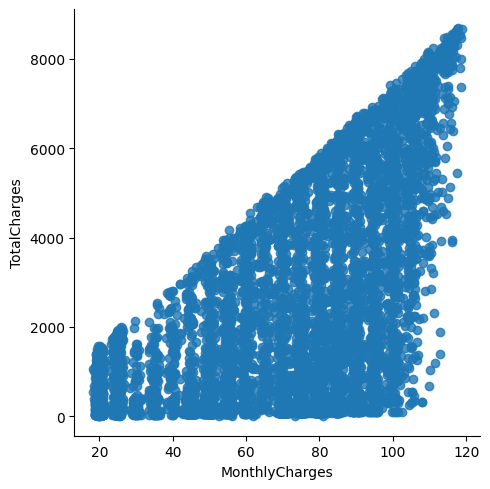

In [ ]:
sns.lmplot(data=telco_copy, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

**OBSERVATION -** Total Charges increase as Monthly Charges increase as expected

**1.2** Churn by Monthly Charges and Total Charges

<ipython-input-61-fb0602f299d3>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_copy.MonthlyCharges[(telco_copy["Churn"] == 0) ],
<ipython-input-61-fb0602f299d3>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_copy.MonthlyCharges[(telco_copy["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

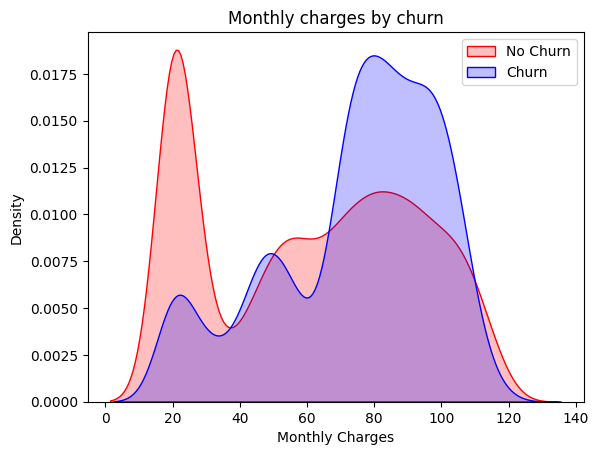

In [ ]:
Mth = sns.kdeplot(telco_copy.MonthlyCharges[(telco_copy["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_copy.MonthlyCharges[(telco_copy["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

**OBSERVATION -** Churn is high when Monthly Charges are high

<ipython-input-62-3bc28487a251>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_copy.TotalCharges[(telco_copy["Churn"] == 0) ],
<ipython-input-62-3bc28487a251>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Tot = sns.kdeplot(telco_copy.TotalCharges[(telco_copy["Churn"] == 1) ],


Text(0.5, 1.0, 'Total charges by churn')

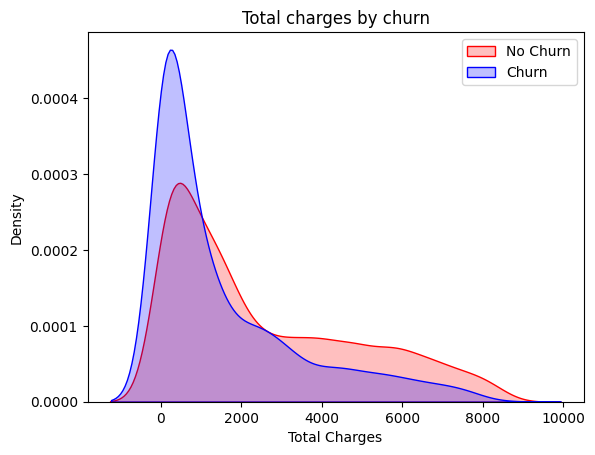

In [ ]:
Tot = sns.kdeplot(telco_copy.TotalCharges[(telco_copy["Churn"] == 0) ],
                color="Red", shade = True)
Tot = sns.kdeplot(telco_copy.TotalCharges[(telco_copy["Churn"] == 1) ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**OBSERVATION -** Surprising insight as higher Churn at lower Total Charges


**2. Bivariate Analysis for Categorical Features**

**2.1** Bar graph

<Axes: xlabel='Contract', ylabel='Churn'>

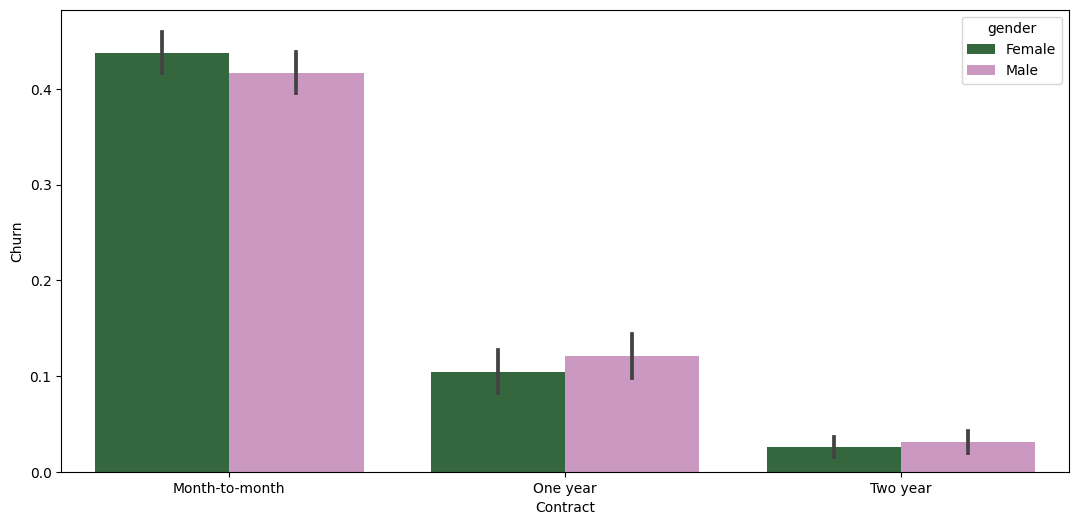

In [ ]:
plt.rcParams['figure.figsize']=(13,6)
sns.barplot(x = 'Contract', y = 'Churn',
                  hue='gender',data=telco_copy, palette='cubehelix')

**OBSERVATION -**
* 'Month-to-month' contract has a significantly higher bar, it suggests a higher churn rate for customers mostly in gender female
*  Because of no contract terms, as they are free to go customers.

<Axes: xlabel='SeniorCitizen', ylabel='Churn'>

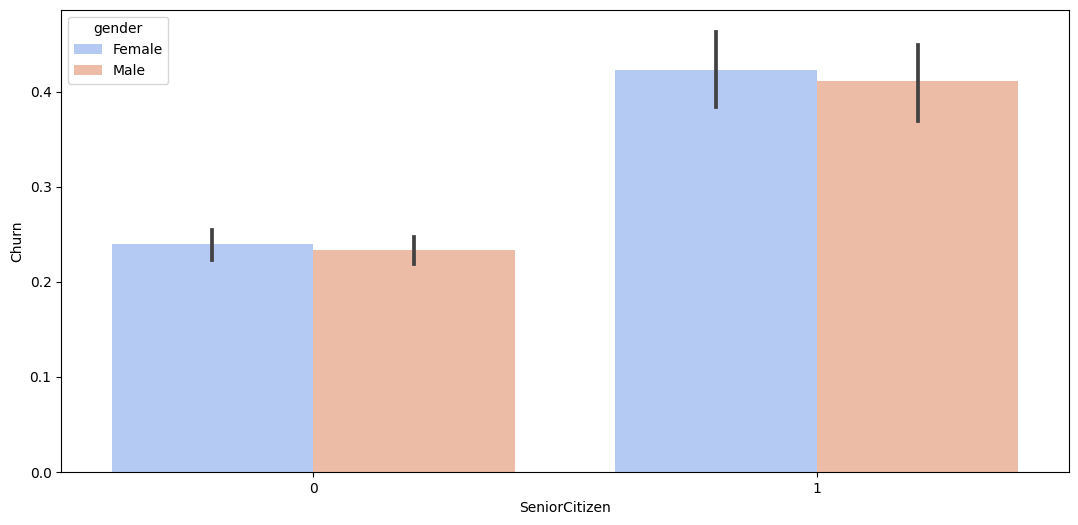

In [ ]:
plt.rcParams['figure.figsize']=(13,6)
sns.barplot(x = 'SeniorCitizen', y = 'Churn',
                  hue='gender',data=telco_copy, palette='coolwarm')

**OBSERVATION -**  Non senior Citizens are high churners

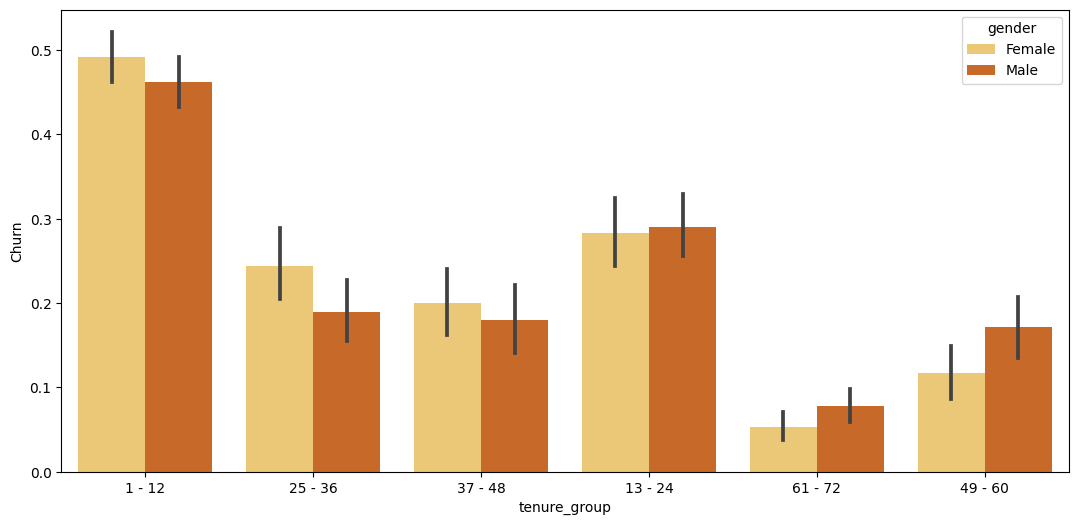

In [ ]:
plt.rcParams['figure.figsize']=(13,6)
ax = sns.barplot(x = 'tenure_group', y = 'Churn',
                  hue='gender',data=telco_copy, palette='YlOrBr')

**OBSERVATION -** Tenure_group from Female Category within 12 month (i.e 1 year) has churned highly

# **CONCLUSION OF DATA VISUALIZATION -**
* Tenure_group within 12 month (i.e 1 year) and Non senior Citizens from female category has churned highly.
* 'Month-to-month' contract has a higher churn rate for customers mostly in gender female. Because of no contract terms, as they are free to go customers.
* Churn is high when Monthly Charges are high and Total Charges is low but we see that between Total and Monthly charges when Total Charges increase also Monthly Charges increases as well.
* Less number of Customers has churned i.e Yes - Count: 1869. Therefore Data is highly Imbalanced in ratio = 73:27.
* ELectronic check is 33.58% as it is the most common payment method of churning more customers.
* The gender distribution is roughly balanced.
* Customers with Fiber opticInternet service type has churned more  DSL is the most popular internet service type.
* PhoneServices and Paperless billing customer that is chosen by a significant number of customers has churned is less and not churned is more.

# **V - FEATURE ENGINEERING**

**1.Creating Binary Features:**  Converting categorical features like 'Partner', 'Dependents' into binary features (0 or 1).

* **'**.map()**'** method in pandas is used to transform values in a Series based on a provided mapping or a function.

In [ ]:
telco_copy['Partner'] = telco_copy['Partner'].map({'Yes': 1, 'No': 0})
telco_copy['Dependents'] = telco_copy['Dependents'].map({'Yes': 1, 'No': 0})

In [ ]:
telco_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,1,0,No,No,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,0,0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,0,0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,0,0,No,No,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,0,0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


**2. Creating a Feature for Family Size:** Combining information from 'Partner' and 'Dependents' to create a feature representing the size of the customer's family.

In [ ]:
telco_copy['FamilySize'] = telco_copy['Partner'] + telco_copy['Dependents'] + 1

In [ ]:
telco_copy.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,FamilySize
0,Female,0,1,0,No,No,DSL,No,Yes,No,...,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12,2
1,Male,0,0,0,Yes,No,DSL,Yes,No,Yes,...,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36,1
2,Male,0,0,0,Yes,No,DSL,Yes,Yes,No,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12,1
3,Male,0,0,0,No,No,DSL,Yes,No,Yes,...,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48,1
4,Female,0,0,0,Yes,No,Fiber optic,No,No,No,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12,1


In [ ]:
telco_copy['FamilySize'].value_counts()

1    3280
2    2014
3    1749
Name: FamilySize, dtype: int64

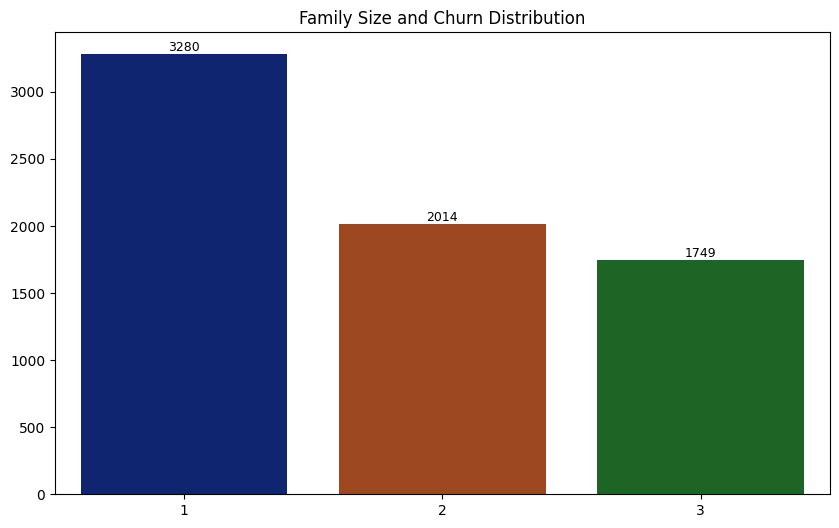

In [ ]:
plt.rcParams['figure.figsize'] = (10, 6)
family_size_counts = telco_copy['FamilySize'].value_counts()

ax = sns.barplot(x=family_size_counts.index, y=family_size_counts.values, palette='dark')
for i, count in enumerate(family_size_counts):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=9)

plt.title('Family Size and Churn Distribution')
plt.show()

# **VI - DATA PREPROCESSING**

**1. Categorical Features Encoding**

**1.1**  One-Hot Encoding

In [ ]:
telco_copy = pd.get_dummies(telco_copy, columns=['gender'])
telco_copy = pd.get_dummies(telco_copy, columns=['tenure_group'])
telco_copy = pd.get_dummies(telco_copy, columns=['Contract'])

In [ ]:
telco_copy.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,gender_Male,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,No,No,DSL,No,Yes,No,No,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,Yes,No,DSL,Yes,No,Yes,No,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,Yes,No,DSL,Yes,Yes,No,No,...,1,1,0,0,0,0,0,1,0,0
3,0,0,0,No,No,DSL,Yes,No,Yes,Yes,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,Yes,No,Fiber optic,No,No,No,No,...,0,1,0,0,0,0,0,1,0,0


**1.2** Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
telco_copy['PhoneService'] = label_encoder.fit_transform(telco_copy['PhoneService'])
telco_copy['MultipleLines'] = label_encoder.fit_transform(telco_copy['MultipleLines'])
telco_copy['OnlineSecurity'] = label_encoder.fit_transform(telco_copy['OnlineSecurity'])
telco_copy['OnlineBackup'] = label_encoder.fit_transform(telco_copy['OnlineBackup'])
telco_copy['DeviceProtection'] = label_encoder.fit_transform(telco_copy['DeviceProtection'])
telco_copy['TechSupport'] = label_encoder.fit_transform(telco_copy['TechSupport'])
telco_copy['StreamingTV'] = label_encoder.fit_transform(telco_copy['StreamingTV'])
telco_copy['StreamingMovies'] = label_encoder.fit_transform(telco_copy['StreamingMovies'])
telco_copy['PaperlessBilling'] = label_encoder.fit_transform(telco_copy['PaperlessBilling'])
telco_copy['InternetService'] = label_encoder.fit_transform(telco_copy['InternetService'])
telco_copy['PaymentMethod'] = label_encoder.fit_transform(telco_copy['PaymentMethod'])

In [ ]:
telco_copy.head(20)

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,gender_Male,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,1,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
5,0,0,0,1,1,1,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
6,0,0,1,1,1,1,0,1,0,0,...,1,0,1,0,0,0,0,1,0,0
7,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
8,0,1,0,1,1,1,0,0,1,1,...,0,0,0,1,0,0,0,1,0,0
9,0,0,1,1,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,1,0


In [ ]:
telco_copy.InternetService.value_counts()

1    3096
0    2421
2    1526
Name: InternetService, dtype: int64

In [ ]:
telco_copy.PaymentMethod.value_counts()

2    2365
3    1612
0    1544
1    1522
Name: PaymentMethod, dtype: int64

In [ ]:
telco_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   SeniorCitizen            7043 non-null   int64  
 1   Partner                  7043 non-null   int64  
 2   Dependents               7043 non-null   int64  
 3   PhoneService             7043 non-null   int64  
 4   MultipleLines            7043 non-null   int64  
 5   InternetService          7043 non-null   int64  
 6   OnlineSecurity           7043 non-null   int64  
 7   OnlineBackup             7043 non-null   int64  
 8   DeviceProtection         7043 non-null   int64  
 9   TechSupport              7043 non-null   int64  
 10  StreamingTV              7043 non-null   int64  
 11  StreamingMovies          7043 non-null   int64  
 12  PaperlessBilling         7043 non-null   int64  
 13  PaymentMethod            7043 non-null   int64  
 14  MonthlyCharges          

**1.4** Correlation of the features with 'Churn'

<Axes: >

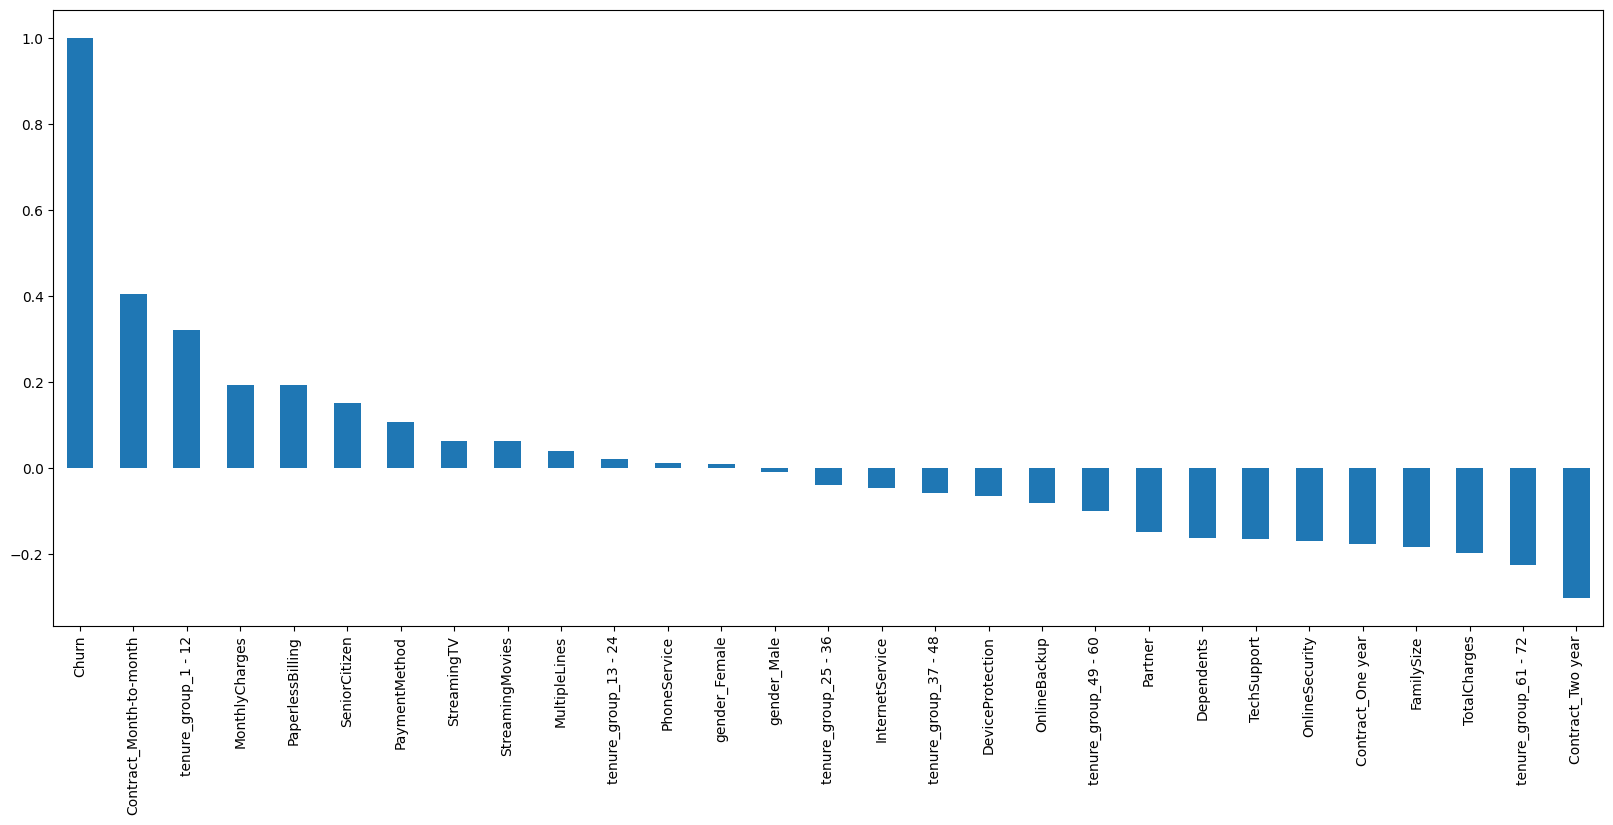

In [ ]:
plt.figure(figsize=(20,8))
telco_copy.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**OBSERVATION -**
* HIGH Churn seen in case of Month to month contracts.
* LOW Churn is seen in case of Long term contracts
* Factors like Gender, Availability of PhoneService and Number of multiple lines have almost NO impact on Churn.

**1.5** Heatmap

<Axes: >

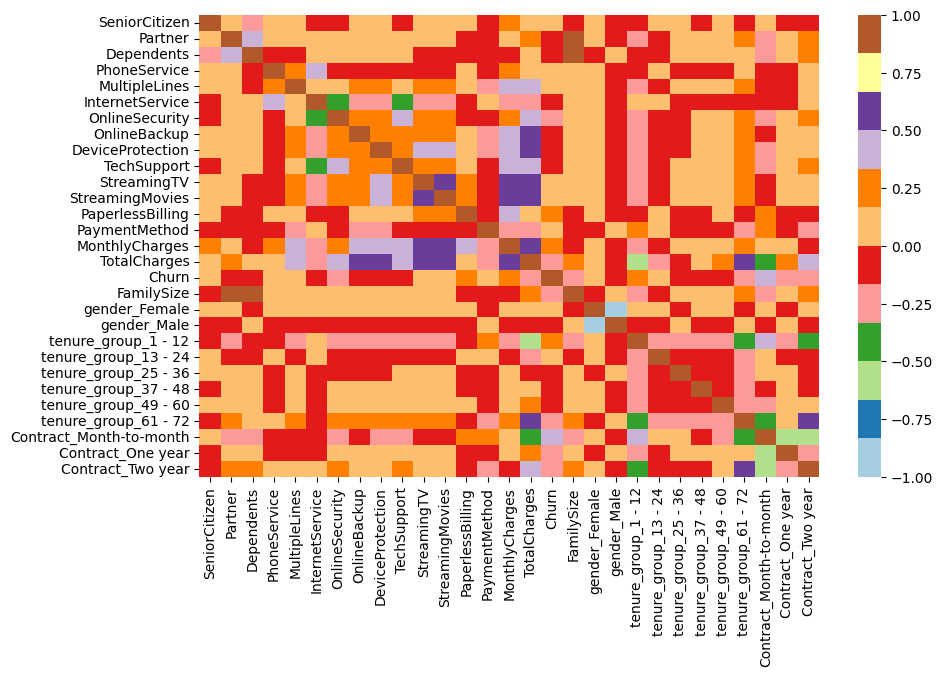

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(telco_copy.corr(), cmap="Paired")

# **VII - TRAIN-TEST SPLIT**

**1. Splitting the telco_copy into X and y and then doing Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X = telco_copy.drop(['Churn'],axis = 1)
y = telco_copy['Churn']

In [ ]:
X.head()

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,gender_Male,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72,Contract_Month-to-month,Contract_One year,Contract_Two year
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,1,0,0,...,1,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,1,1,...,1,0,0,0,1,0,0,0,1,0
4,0,0,0,1,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0


In [ ]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [ ]:
telco_copy.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 20)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 28)
(1409, 28)
(5634,)
(1409,)


# **VIII - FEATURE SCALING**

Text(0.5, 1.0, 'Before Scaling')

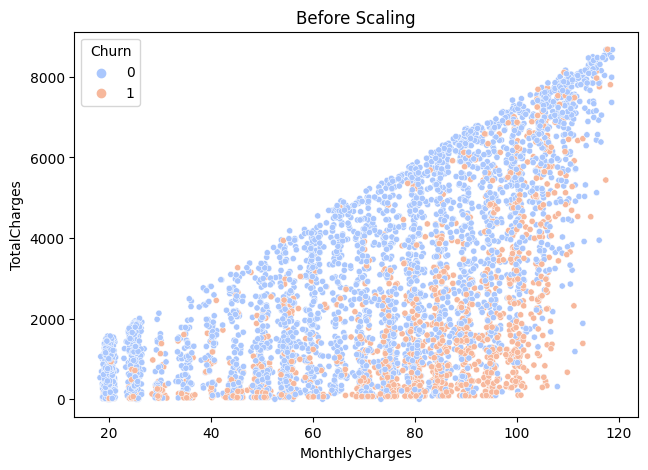

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=pd.concat([X_train, y_train], axis=1), s=20, palette='coolwarm')
plt.title('Before Scaling')

**1. Standard Scaling Analysis**

**1.1** Scaling the numerical features

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

**1.2** Extracting numerical features for scaling

In [ ]:
numerical_features = [ 'MonthlyCharges', 'TotalCharges']

**2. Fitting and transforming the training data, saving the scaling parameters for future use in test data**

In [ ]:
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

**1.3** Converting scaled data back to DataFrame for visualization

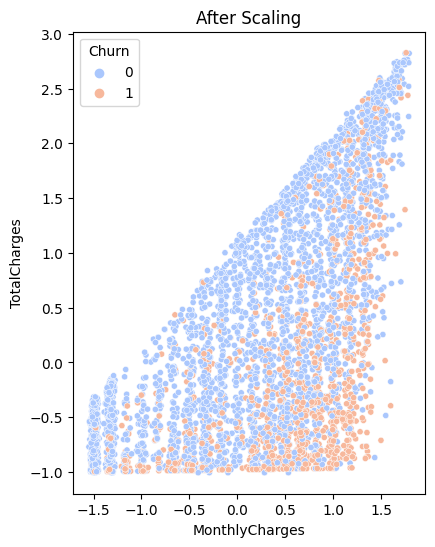

In [ ]:
X_train_scaled_df = X_train[numerical_features].copy()
X_train_scaled_df[numerical_features] = X_train[numerical_features]

# Visualize after scaling
plt.subplot(1, 2, 2)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=pd.concat([X_train_scaled_df, y_train], axis=1), s=20, palette='coolwarm')
plt.title('After Scaling')

plt.show()

# **IX - MODEL BUILDING**

In [ ]:
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

**(1.) DECISION TREE CLASSIFIER**

In [ ]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred=model_dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
model_dt.score(X_test,y_test)

0.8090844570617459

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1063
           1       0.63      0.54      0.58       346

    accuracy                           0.81      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[952 111]
 [158 188]]


**OBSERVATION -**
* As we can see that the accuracy is low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.
* Hence, it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.
* Hence, moving ahead to call SMOTEENN (UpSampling + ENN)

In [ ]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X,y)

In [ ]:
Xr_train,Xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [ ]:
model_smote_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_smote_dt.fit(Xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
yr_predict = model_smote_dt.predict(Xr_test)

In [ ]:
model_smote_dt.score(Xr_test, yr_test)

0.9191745485812554

In [ ]:
print(metrics.classification_report(yr_test, yr_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       546
           1       0.91      0.94      0.92       617

    accuracy                           0.92      1163
   macro avg       0.92      0.92      0.92      1163
weighted avg       0.92      0.92      0.92      1163



In [ ]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[492  54]
 [ 40 577]]


**OBSERVATION -** Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

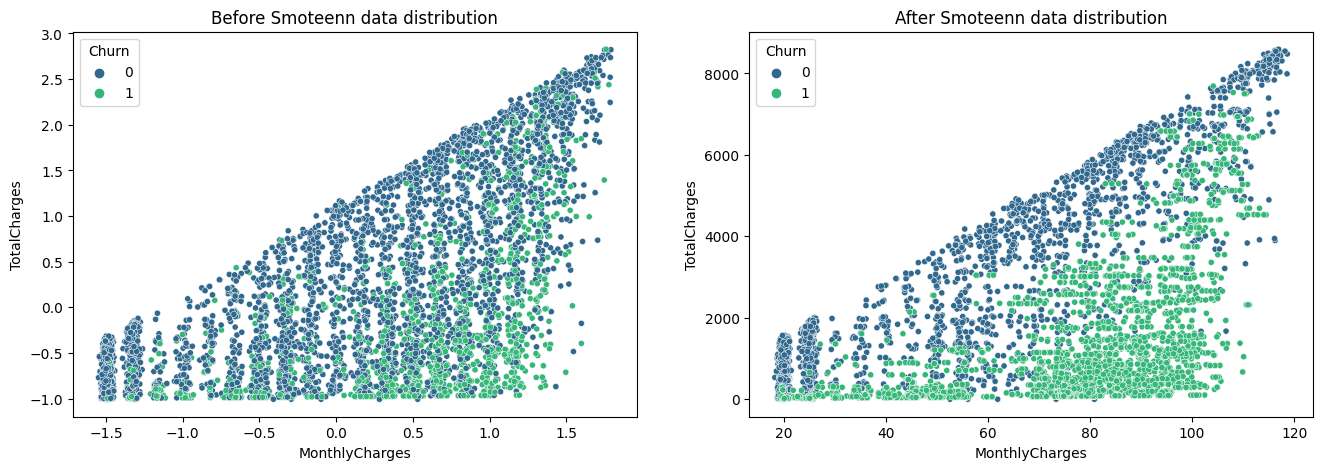

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(1, 2,1)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=pd.concat([X_train, y_train], axis=1), s=20, palette='viridis')
plt.title('Before Smoteenn data distribution')
plt.subplot(1, 2,2)
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=pd.concat([X_resampled, y_resampled], axis=1), s=20, palette='viridis')
plt.title('After Smoteenn data distribution')
plt.show()

**(2.) RANDOM FOREST CLASSIFIER**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
y_pred=model_rf.predict(X_test)

In [ ]:
model_rf.score(X_test,y_test)

0.8161816891412349

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1063
           1       0.69      0.47      0.55       346

    accuracy                           0.82      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.82      0.80      1409



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[989  74]
 [185 161]]


In [ ]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,y)

In [ ]:
Xr_train1,Xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [ ]:
model_smote_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [ ]:
model_smote_rf.fit(Xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [ ]:
yr_predict1 = model_smote_rf.predict(Xr_test1)

In [ ]:
model_smote_rf.score(Xr_test1, yr_test1)

0.9272727272727272

In [ ]:
print(metrics.classification_report(yr_test1, yr_predict1))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92       537
           1       0.90      0.97      0.93       618

    accuracy                           0.93      1155
   macro avg       0.93      0.92      0.93      1155
weighted avg       0.93      0.93      0.93      1155



In [ ]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[470  67]
 [ 17 601]]


**OBSERVATION -** With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

**(3.) K - NEAREST NEIGHBORS CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
model_knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=model_knn.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model_knn.score(X_test,y_test)

0.7743080198722498

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1063
           1       0.54      0.55      0.54       346

    accuracy                           0.77      1409
   macro avg       0.70      0.70      0.70      1409
weighted avg       0.78      0.77      0.77      1409



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[901 162]
 [156 190]]


In [ ]:
sm = SMOTEENN()
X_resampled2, y_resampled2 = sm.fit_resample(X,y)

In [ ]:
Xr_train2,Xr_test2,yr_train2,yr_test2=train_test_split(X_resampled2, y_resampled2,test_size=0.2)

In [ ]:
model_smote_knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
model_smote_knn.fit(Xr_train2,yr_train2)

KNeighborsClassifier()

In [ ]:
yr_predict2 = model_smote_knn.predict(Xr_test2)

In [ ]:
model_smote_knn.score(Xr_test2, yr_test2)

0.9580838323353293

In [ ]:
print(metrics.classification_report(yr_test2, yr_predict2))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       536
           1       0.96      0.96      0.96       633

    accuracy                           0.96      1169
   macro avg       0.96      0.96      0.96      1169
weighted avg       0.96      0.96      0.96      1169



In [ ]:
print(metrics.confusion_matrix(yr_test2, yr_predict2))

[[510  26]
 [ 23 610]]


**OBSERVATION -** With K - Nearest Classifier,  we are able to get more good results, infact better than Random Forest Classifier.

**(4.) NAIVE BAYE'S CLASSIFIER**

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_nb = GaussianNB()

In [ ]:
model_nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred=model_nb.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [ ]:
model_nb.score(X_test,y_test)

0.7040454222853088

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1063
           1       0.45      0.83      0.58       346

    accuracy                           0.70      1409
   macro avg       0.68      0.75      0.68      1409
weighted avg       0.81      0.70      0.72      1409



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[704 359]
 [ 58 288]]


In [ ]:
sm = SMOTEENN()
X_resampled3, y_resampled3 = sm.fit_resample(X,y)

In [ ]:
Xr_train3,Xr_test3,yr_train3,yr_test3=train_test_split(X_resampled3, y_resampled3,test_size=0.2)

In [ ]:
model_smote_nb = GaussianNB()

In [ ]:
model_smote_nb.fit(Xr_train3,yr_train3)

GaussianNB()

In [ ]:
yr_predict3 = model_smote_nb.predict(Xr_test3)

In [ ]:
model_smote_nb.score(Xr_test3, yr_test3)

0.8774635818337618

In [ ]:
print(metrics.classification_report(yr_test3, yr_predict3))

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       538
           1       0.86      0.92      0.89       629

    accuracy                           0.88      1167
   macro avg       0.88      0.87      0.88      1167
weighted avg       0.88      0.88      0.88      1167



In [ ]:
print(metrics.confusion_matrix(yr_test3, yr_predict3))

[[447  91]
 [ 52 577]]


**OBSERVATION -** With Naive Baye's Classifier, we are able to get not so good results than all the above Classifier Model.

**(5.) SUPPORT VECTOR CLASSIFICATION (SVC) CLASSIFIER**

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svc = SVC(kernel='linear', C=1)

In [ ]:
model_svc.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [ ]:
y_pred=model_svc.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model_svc.score(X_test,y_test)

0.8119233498935415

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1063
           1       0.65      0.50      0.57       346

    accuracy                           0.81      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[971  92]
 [173 173]]


In [ ]:
sm = SMOTEENN()
X_resampled4, y_resampled4 = sm.fit_resample(X,y)

In [ ]:
Xr_train4,Xr_test4,yr_train4,yr_test4=train_test_split(X_resampled4, y_resampled4,test_size=0.2)

In [ ]:
model_smote_svc = SVC(kernel='linear', C=1)

In [ ]:
model_smote_svc.fit(Xr_train4,yr_train4)

SVC(C=1, kernel='linear')

In [ ]:
yr_predict4 = model_smote_svc.predict(Xr_test4)

In [ ]:
model_smote_svc.score(Xr_test4, yr_test4)

0.9242553191489362

In [ ]:
print(metrics.classification_report(yr_test4, yr_predict4))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       545
           1       0.92      0.94      0.93       630

    accuracy                           0.92      1175
   macro avg       0.92      0.92      0.92      1175
weighted avg       0.92      0.92      0.92      1175



In [ ]:
print(metrics.confusion_matrix(yr_test4, yr_predict4))

[[496  49]
 [ 40 590]]



**OBSERVATION -** With SVC Classifier, we are able to get good results than Random Forest CLassifier and Naive Baye's Classifier.

**(6.) XGBOOST CLASSIFIER**

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xg = XGBClassifier(random_state=42)

In [ ]:
model_xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred=model_xg.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model_xg.score(X_test,y_test)

0.8062455642299503

In [ ]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      1063
           1       0.61      0.58      0.60       346

    accuracy                           0.81      1409
   macro avg       0.74      0.73      0.73      1409
weighted avg       0.80      0.81      0.80      1409



In [ ]:
print(confusion_matrix(y_test, y_pred))

[[934 129]
 [144 202]]


In [ ]:
sm = SMOTEENN()
X_resampled5, y_resampled5 = sm.fit_resample(X,y)

In [ ]:
Xr_train5,Xr_test5,yr_train5,yr_test5=train_test_split(X_resampled5, y_resampled5,test_size=0.2)

In [ ]:
model_smote_xg = XGBClassifier(random_state=42)

In [ ]:
model_smote_xg.fit(Xr_train5,yr_train5)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
yr_predict5 = model_smote_xg.predict(Xr_test5)

In [ ]:
model_smote_xg.score(Xr_test5, yr_test5)

0.9536878216123499

In [ ]:
print(metrics.classification_report(yr_test5, yr_predict5))

              precision    recall  f1-score   support

           0       0.96      0.95      0.95       551
           1       0.95      0.96      0.96       615

    accuracy                           0.95      1166
   macro avg       0.95      0.95      0.95      1166
weighted avg       0.95      0.95      0.95      1166



In [ ]:
print(metrics.confusion_matrix(yr_test5, yr_predict5))

[[521  30]
 [ 24 591]]


# **X - MODELS COMPARISON**

 **1. Looking at all the Models altogether with accuracy score**

Model		Accuracy_score
------------------------
KNN model		0.9525
XGBClassifier		0.9525
Random Forest		0.9292
Decision Tree		0.9275
SVc model		0.9232
Naive Bayes		0.8792


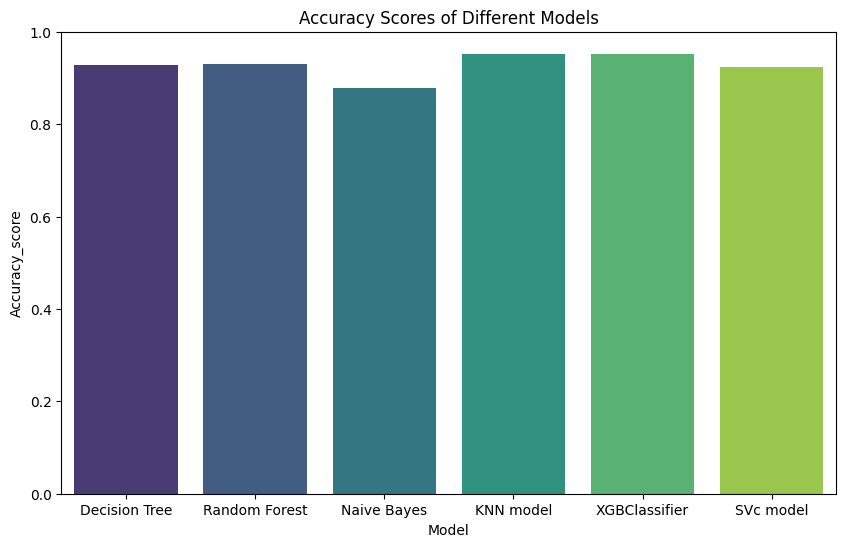

In [ ]:
from sklearn.metrics import accuracy_score

sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(X, y)

# Splitting the data into training and testing sets
xr_train, xr_test, yr_train, yr_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Defining models
models = {
    'Decision Tree': DecisionTreeClassifier(criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8),
    'Random Forest': RandomForestClassifier(n_estimators=100, criterion='gini', random_state=100, max_depth=6, min_samples_leaf=8),
    'Naive Bayes': GaussianNB(),
    'KNN model': KNeighborsClassifier(),
    'XGBClassifier': XGBClassifier(random_state=42),
    'SVc model': SVC(kernel='linear', C=1)
}

# Evaluating models
results = {}

for model_name, model in models.items():
    model.fit(xr_train, yr_train)
    yr_predict = model.predict(xr_test)
    accuracy = metrics.accuracy_score(yr_test, yr_predict)
    results[model_name] = accuracy

# Displaying results
sorted_results = sorted(results.items(), key=lambda x: x[1], reverse=True)
print("Model\t\tAccuracy_score")
print("------------------------")
for model_name, accuracy in sorted_results:
    print(f"{model_name}\t\t{accuracy:.4f}")

# Converting results to a DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy_score'])

# Creating a bar plot for accuracy scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy_score', data=results_df, palette='viridis')
plt.title('Accuracy Scores of Different Models')
# Showing the plot
plt.show()

**2. Looking for maximum and minimum Models name with  Accuracy score**

In [ ]:
# Displaying the highest and lowest accuracy models
highest_accuracy_model = sorted_results[0][0]
lowest_accuracy_model = sorted_results[-1][0]

print(f"\nHighest Accuracy_score Model: {highest_accuracy_model} - {results[highest_accuracy_model]:.4f}")
print(f"Lowest Accuracy_score Model: {lowest_accuracy_model} - {results[lowest_accuracy_model]:.4f}")


Highest Accuracy_score Model: KNN model - 0.9525
Lowest Accuracy_score Model: Naive Bayes - 0.8792


# **CONCLUSION OF MODELS COMPARISON -**
After evaluating different models for Churn detection, including Decision Tree, Random Forest, K-Nearest Neighbors, Naïve Baye’s and SVC, it can be concluded that the KNN model achieved the highest accuracy among the evaluated models. KNN is known for its simplicity and effectiveness, especially when dealing with well-defined clusters or neighborhoods in the feature space. The high accuracy suggests that the KNN model was able to capture the underlying patterns in the dataset effectively.



